# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

In [1]:
import qem
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from qem.image_fitting import ImageModelFitting
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame(columns=['atoms','StatSTEM','gaussian','lorentzian','voigt','voronoi','ground_truth'])


def fit_cell(image, dx, input_coordinates,model_type='lorentzian'):
    model=ImageModelFitting(image, dx=dx,elements=['Pt'])
    model.pbc = False
    model.fit_background = False
    model.same_width = True
    model.coordinates=input_coordinates/dx-1
    mask = (model.coordinates[:,0]>10) & (model.coordinates[:,0]<image.shape[0]-10) & (model.coordinates[:,1]>10) & (model.coordinates[:,1]<image.shape[1]-10)
    if model_type =='voronoi':
        model.model_type ='gaussian'
        model.init_params()
        model.voronoi_integration()
        return model.voronoi_volume[mask]
    elif model_type =='ground_truth':
        volume = model.image[:-1,:-1].sum()*dx**2/64
        return volume
    else:
        model.model_type = model_type
        params = model.init_params(0.6)
        # params = model.fit_global(params, maxiter=10000, tol=1e-10, verbose=False,step_size=0.001)
        model.minimize(params,tol=1e-5)
    return model.volume[mask]

for i in tqdm(range(1,50)):
    file = f'/home/zzhang/OneDrive/code/qem/data/2016-05_efficientFitProgram/outputFitProgram_Pt_100_{i}atoms.mat'
    legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)
    inputStatSTEM = legacyStatSTEM['input']
    outputStatSTEM = legacyStatSTEM['output']
    image = inputStatSTEM['obs']
    dx = inputStatSTEM['dx']

    input_coordinates = inputStatSTEM['coordinates']
    output_volume = outputStatSTEM['volumes']
    for model_type in ['voronoi','lorentzian','gaussian','voigt','ground_truth']:
        volume = fit_cell(image, dx, input_coordinates,model_type)
        df.loc[i,model_type] = volume
    df.loc[i,'atoms'] = i
    df.loc[i,'StatSTEM'] = output_volume
  


INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
Integrating: 100%|██████████| 81/81 [00:00<00:00, 15779.05it/s]
/home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/scipy/optimize/bfgs.py:102: UserWarning: Explicitly requested dtype float64 requested in eye is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  initial_H = jnp.eye(d, dtype=x0.dtype)
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': Found CUDA version 12010, but JAX was built against version 12020, which is newer. The copy of CUDA that is installed must be at least as new as the version against which JAX was built.
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could n

/home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/scipy/optimize/bfgs.py:102: UserWarning: Explicitly requested dtype float64 requested in eye is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  initial_H = jnp.eye(d, dtype=x0.dtype)


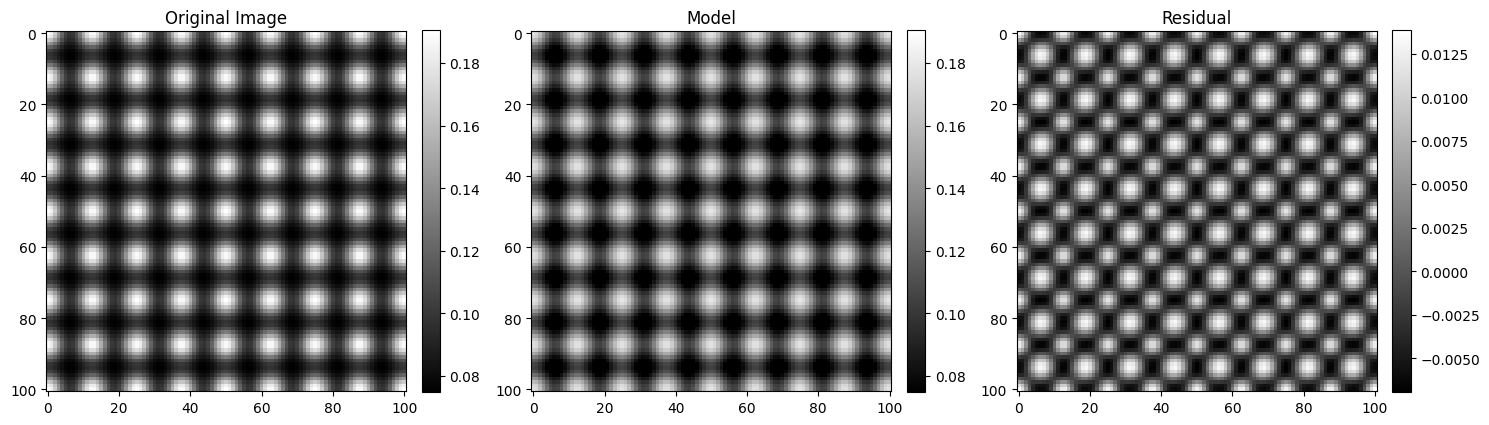

In [29]:
import qem
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from qem.image_fitting import ImageModelFitting
import pandas as pd
from tqdm import tqdm


file = f'/home/zzhang/OneDrive/code/qem/data/2016-05_efficientFitProgram/outputFitProgram_Pt_100_43atoms.mat'
legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
image = inputStatSTEM['obs']
dx = inputStatSTEM['dx']

input_coordinates = inputStatSTEM['coordinates']
output_volume = outputStatSTEM['volumes']


model=ImageModelFitting(image, dx=dx,elements=['Pt'])
model.pbc = False
model.fit_background = False
model.same_width = True
model.coordinates=input_coordinates/dx-1
model.model_type = 'gaussian'
params = model.init_params(guess_radius=True)
# params = model.fit_random_batch(params, maxiter=1000, tol=1e-10, verbose=False,step_size=0.01)
params = model.minimize(params,tol=1e-10)
model.plot_fitting()


In [23]:
model.image[:-1,:-1].sum()*dx**2/64

0.43356282728252266

In [6]:
mask = (model.coordinates[:,0]>20) & (model.coordinates[:,0]<80) & (model.coordinates[:,1]>20) & (model.coordinates[:,1]<80)
model.volume[mask].mean()

Array(0.4517688, dtype=float32)

In [22]:
model.volume

Array([0.48186105, 0.4777013 , 0.47802597, 0.47623923, 0.4776364 ,
       0.47660714, 0.47837   , 0.4775776 , 0.47927445, 0.47768205,
       0.44970778, 0.4424929 , 0.4451023 , 0.44121644, 0.44511822,
       0.4425023 , 0.44991702, 0.47755647, 0.47799602, 0.4425216 ,
       0.44239596, 0.43773723, 0.4410675 , 0.4377107 , 0.4423736 ,
       0.44246158, 0.4783514 , 0.4762592 , 0.4451411 , 0.43778127,
       0.44002882, 0.43607876, 0.4400029 , 0.43776047, 0.44509423,
       0.47658187, 0.47766426, 0.44116455, 0.44110903, 0.43609563,
       0.4398596 , 0.43609688, 0.4410495 , 0.44119662, 0.47770497,
       0.47659874, 0.4451244 , 0.43771365, 0.43997368, 0.43608922,
       0.4400187 , 0.43778363, 0.44511274, 0.47628087, 0.47835335,
       0.44246206, 0.44241527, 0.4377594 , 0.44103625, 0.43772352,
       0.4424236 , 0.44251412, 0.47802302, 0.47755304, 0.44997624,
       0.44246975, 0.44510794, 0.44123304, 0.44512725, 0.44250214,
       0.44972378, 0.47763363, 0.47935757, 0.4775405 , 0.47833

In [14]:
image[:-1,:-1].sum()/64*dx**2

0.23372409874064587

Text(0, 0.5, 'SCS ($\\AA^2$)')

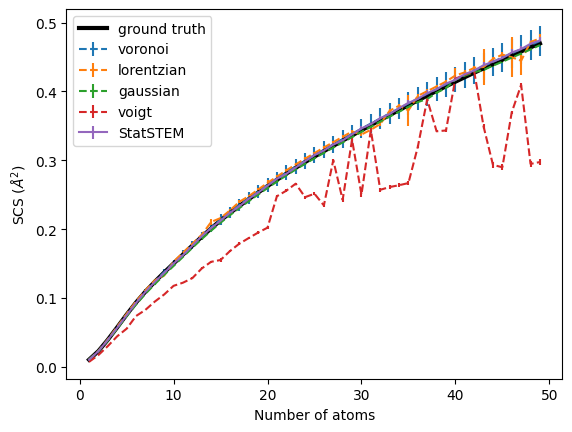

In [30]:
stastem_mean = [x.mean() for x in df['StatSTEM']]
stastem_std = [x.std() for x in df['StatSTEM']]

for model_type in ['voronoi','lorentzian','gaussian','voigt']:
    mean = [x[20:-20].mean() for x in df[model_type]]
    std = [x[20:-20].std() for x in df[model_type]]
    plt.errorbar(df['atoms'],mean,yerr=std,label=model_type,linestyle='--')
plt.errorbar(df['atoms'],stastem_mean,yerr=stastem_std,label='StatSTEM')
plt.plot(df['atoms'],df['ground_truth'],label='ground truth', linewidth=3, color='black')
plt.legend()
plt.xlabel('Number of atoms')
plt.ylabel(r'SCS ($\AA^2$)')

Text(0.5, 1.0, 'Residuals')

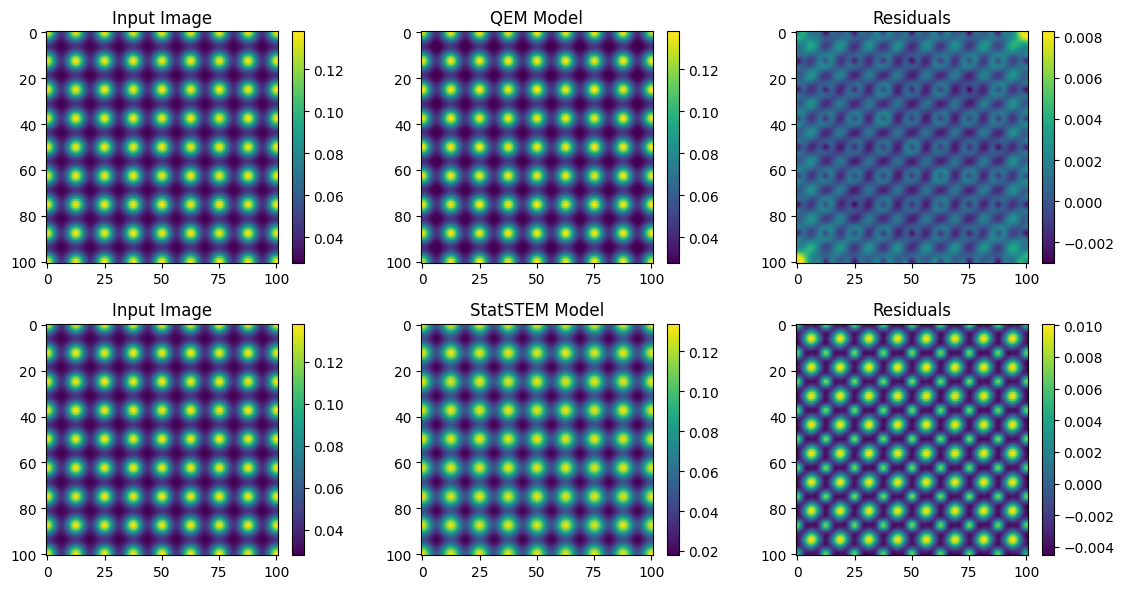

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.model)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.model
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-inputStatSTEM['obs'].max()*0.1,inputStatSTEM['obs'].max()*0.1])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-inputStatSTEM['obs'].max()*0.1,inputStatSTEM['obs'].max()*0.1])
plt.tight_layout()
plt.title('Residuals')

In [1]:
import numpy as np

def compute_fim(x, y, theta):
    A, x0, y0, sigma = theta
    
    # Derivatives of the Gaussian with respect to the parameters
    f = A * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))
    
    dfdA = f / A
    dfdx0 = f * (x - x0) / sigma**2
    dfdy0 = f * (y - y0) / sigma**2
    dfdSigma = f * ((x - x0)**2 + (y - y0)**2) / sigma**3

    # Fisher Information Matrix elements
    I_AA = np.sum(dfdA * dfdA)
    I_x0x0 = np.sum(dfdx0 * dfdx0)
    I_y0y0 = np.sum(dfdy0 * dfdy0)
    I_sigmaSigma = np.sum(dfdSigma * dfdSigma)
    
    I_Ax0 = np.sum(dfdA * dfdx0)
    I_Ay0 = np.sum(dfdA * dfdy0)
    I_A_sigma = np.sum(dfdA * dfdSigma)
    I_x0y0 = np.sum(dfdx0 * dfdy0)
    I_x0_sigma = np.sum(dfdx0 * dfdSigma)
    I_y0_sigma = np.sum(dfdy0 * dfdSigma)

    # Construct the FIM
    FIM = np.array([
        [I_AA, I_Ax0, I_Ay0, I_A_sigma],
        [I_Ax0, I_x0x0, I_x0y0, I_x0_sigma],
        [I_Ay0, I_x0y0, I_y0y0, I_y0_sigma],
        [I_A_sigma, I_x0_sigma, I_y0_sigma, I_sigmaSigma]
    ])
    
    return FIM

def compute_crb(fim):
    # Compute the Cramer-Rao Bound by taking the inverse of the Fisher Information Matrix
    FIM_inv = np.linalg.inv(fim)
    
    # The CRB for parameters are the diagonal elements of the inverse FIM
    crb = np.diag(FIM_inv)
    
    return crb

# Example usage
# Assume a 2D grid of points (x, y) over the image with Gaussian parameters
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Parameters: amplitude A, mean x0, y0, and standard deviation sigma
theta = (1.0, 0.0, 0.0, 1.0)

# Compute the Fisher Information Matrix
fim = compute_fim(x, y, theta)

# Compute the Cramer-Rao Bound for the parameters
crb = compute_crb(fim)

print("Cramer-Rao Bound for the parameters:")
print(f"Amplitude (A): {crb[0]}")
print(f"Mean position x0: {crb[1]}")
print(f"Mean position y0: {crb[2]}")
print(f"Sigma: {crb[3]}")


Cramer-Rao Bound for the parameters:
Amplitude (A): 0.006495457328022552
Mean position x0: 0.006495457324740544
Mean position y0: 0.006495457324740544
Sigma: 0.0032477286660979893


In [22]:
import jax.numpy as jnp
from functools import partial
from qem.stats import add_poisson_noise, compute_fim, compute_crb

# Example usage
def gaussian_2d(x, y, params):
    A, x0, y0, sigma = params
    return A * jnp.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

def lorentzian_2d(x, y, params):
    A, x0, y0, gamma = params
    return A / (1 + ((x - x0)**2 + (y - y0)**2) / gamma**2)

# Define a grid of points (x, y) over the image
x = jnp.linspace(-5, 5, 100)
y = jnp.linspace(-5, 5, 100)
x, y = jnp.meshgrid(x, y)

# Parameters for the model (Amplitude, x0, y0, sigma/gamma)
gaussian_params = jnp.array([1.0, 0.0, 0.0, 1.0])
lorentzian_params = jnp.array([1.0, 0.0, 0.0, 1.0])


# Compute the Fisher Information Matrix for Gaussian with Poisson noise
import numpy as np
crb_gaussian_list = []
dose = 1e1
thickness = np.arange(1, 30, 1)
for t in thickness:
    func = lambda params: gaussian_2d(x, y, params) *dose * t
    fim_gaussian = compute_fim(func, params = gaussian_params)
    crb_gaussian = compute_crb(fim_gaussian)
    crb_gaussian_list.append(crb_gaussian)

In [11]:
crb_gaussian_list

[array([0.00180733, 0.13083452, 0.13083451, 0.06688543]),
 array([0.00127798, 0.09251398, 0.09251397, 0.04729514]),
 array([0.00104523, 0.07550605, 0.07550605, 0.03867966]),
 array([0.00090367, 0.06541726, 0.06541726, 0.03344271]),
 array([0.00080616, 0.05846203, 0.05846203, 0.02985155]),
 array([0.00073909, 0.05339084, 0.05339084, 0.02735065]),
 array([0.00068455, 0.04931922, 0.04931922, 0.02532558]),
 array([0.00063899, 0.04625699, 0.04625698, 0.02364757]),
 array([0.0006016 , 0.04359606, 0.04359607, 0.02226642]),
 array([0.00057004, 0.0413389 , 0.0413389 , 0.02110824]),
 array([0.00054504, 0.03940564, 0.03940564, 0.02017122]),
 array([0.00052261, 0.03775303, 0.03775303, 0.01933983]),
 array([0.00050126, 0.03628221, 0.03628221, 0.01855004]),
 array([0.00048405, 0.03487395, 0.03487395, 0.01790789]),
 array([0.00046589, 0.03380406, 0.03380406, 0.01723901]),
 array([0.00045183, 0.03270863, 0.03270863, 0.01672136]),
 array([0.00043907, 0.03169269, 0.03169269, 0.01624427]),
 array([0.0004

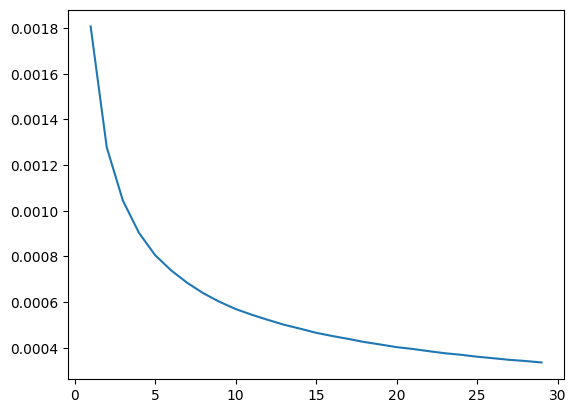

In [12]:
import matplotlib.pyplot as plt
crb_gaussian_list= np.array(crb_gaussian_list)
plt.plot(thickness,crb_gaussian_list[:,0],label='Amplitude')
# plt.plot(thickness,crb_gaussian_list[:,1],label='shift x')
# plt.plot(thickness,crb_gaussian_list[:,2],label='shift y')
# plt.plot(thickness,crb_gaussian_list[:,3],label='sigma')
# plt.xscale('log')

In [17]:
crb_gaussian_list.shape

(100, 4)

In [2]:
import jax
import jax.numpy as jnp

def joint_probability_2d(observations, params, model_func, x, y, dose):
    """
    Compute the joint probability P(omega | theta) for a 2D image with Poisson-distributed data.

    Parameters:
    - observations: The observed 2D image data (e.g., pixel values) as a JAX array.
    - params: Parameters of the model function as a JAX array.
    - model_func: The model function to compute lambda_k.
    - x, y: Grid of points over the 2D image (same shape as observations).
    - dose: Dose parameter that scales the intensity (affects Poisson noise).

    Returns:
    - Joint probability P(omega | theta) for the entire 2D image.
    """
    # Compute the expected values lambda_k (same shape as the observations)
    lambda_k = dose * model_func(x, y, params)
    
    # Compute the individual probabilities for each pixel
    individual_probs = (lambda_k**observations) * jnp.exp(-lambda_k) / jax.scipy.special.factorial(observations)
    
    # Compute the joint probability by taking the product of all pixel probabilities
    joint_prob = jnp.prod(individual_probs)
    
    return joint_prob

# Example usage
def example_model(x, y, params):
    # Example model: Gaussian-like function
    return params[0] * jnp.exp(-((x - params[1])**2 + (y - params[2])**2) / (2 * params[3]**2))

x = jnp.linspace(-5, 5, 100)
y = jnp.linspace(-5, 5, 100)
x, y = jnp.meshgrid(x, y)

# Example observed 2D image (could be real data)
key = jax.random.PRNGKey(0)
dose = 1e3
expected = example_model(x, y, jnp.array([10.0, 0.0, 0.0, 1.0]))*dose
observations = jax.random.poisson(key, expected)

# Example parameters (e.g., amplitude, center_x, center_y, width)
params = jnp.array([10.0, 0.0, 0.0, 1.0])

# Example dose value

# Compute the joint probability
joint_prob = joint_probability_2d(observations, params, example_model, x, y, dose)
print(joint_prob)


nan


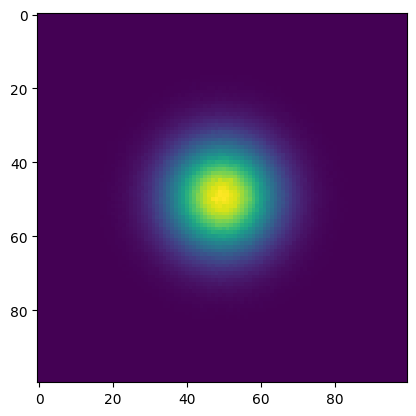

In [4]:
import matplotlib.pyplot as plt
plt.imshow(observations)

In [51]:
import jax
import numpy as np
key = jax.random.PRNGKey(0)
dose = 1e5
gaussian_params = jnp.array([1.0, 0.0, 0.0, 1.0])
expected = gaussian_2d(x, y, gaussian_params)*dose
observations = jax.random.poisson(key, expected)

def joint_probability_2d(observations, params, model_func):
    """
    Compute the joint probability P(omega | theta) for a 2D image with Poisson-distributed data.

    Parameters:
    - observations: The observed 2D image data (e.g., pixel values) as a JAX array.
    - params: Parameters of the model function as a JAX array.
    - model_func: The model function to compute lambda_k.
    - x, y: Grid of points over the 2D image (same shape as observations).
    - dose: Dose parameter that scales the intensity (affects Poisson noise).

    Returns:
    - Joint probability P(omega | theta) for the entire 2D image.
    """
    # Compute the expected values lambda_k (same shape as the observations)
    lambda_k = model_func(params)
    
    # Compute the individual probabilities for each pixel
    individual_probs = (lambda_k**observations) * jnp.exp(-lambda_k) / jax.scipy.special.factorial(observations)
    individual_probs = individual_probs.to_numpy()
    individual_probs = jnp.nan_to_num(individual_probs, nan=1.0)
    # Compute the joint probability by taking the product of all pixel probabilities
    joint_prob = jnp.prod(individual_probs)
    
    return joint_prob

In [53]:
func = lambda params: gaussian_2d(x, y, params) *dose
joint_probability_2d(observations, gaussian_params, func)

Array(nan, dtype=float32)

In [42]:
observations.max()

Array(99812, dtype=int32)

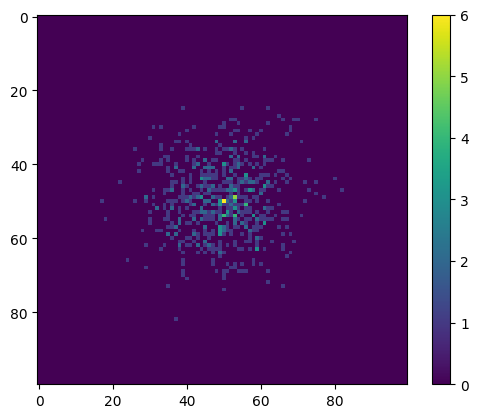

In [37]:
plt.imshow(observations)
plt.colorbar()

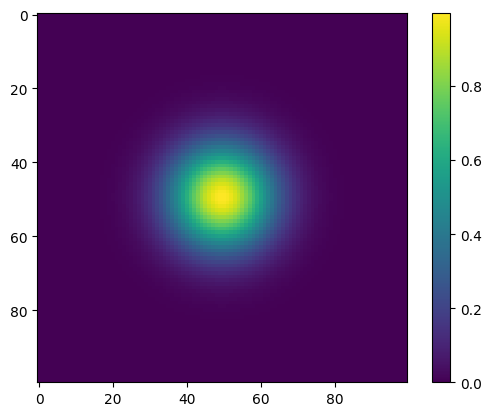

In [39]:
plt.imshow(expected)
plt.colorbar()